In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Read Data

In [ ]:
df=pd.read_csv('prices.csv')

In [ ]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


Check for Null Values

In [ ]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

# Check Datatypes of the features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812664 entries, 0 to 812663
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    812664 non-null  object 
 1   symbol  812664 non-null  object 
 2   open    812664 non-null  float64
 3   close   812664 non-null  float64
 4   low     812664 non-null  float64
 5   high    812664 non-null  float64
 6   volume  812664 non-null  float64
dtypes: float64(5), object(2)
memory usage: 43.4+ MB


In [ ]:
df.describe()

,open,close,low,high,volume
count,812664.000000,812664.000000,812664.000000,812664.000000,8.126640e+05
mean,70.005135,70.027648,69.291992,70.706931,5.459642e+06
std,82.193781,82.194840,81.382459,82.962112,1.265098e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.610001,33.619999,33.240002,33.970001,1.224200e+06
50%,52.290001,52.310001,51.750000,52.820000,2.487000e+06
75%,79.139999,79.169998,78.389999,79.889999,5.254500e+06
max,1475.000000,1469.560059,1462.750000,1476.520020,8.596434e+08


In [ ]:
df.shape

(812664, 7)

In [ ]:
df['symbol'].nunique()

501

# Sampling Amazon from the dataset
Data set is good for analysis. however, since there are many company details are there. we will sample it with one Company

In [ ]:
df1=df[df['symbol']=='AMZN']

In [ ]:
df1.head()

,date,symbol,open,close,low,high,volume
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [ ]:
df1.describe()

,open,close,low,high,volume
count,1685.000000,1685.000000,1685.000000,1685.000000,1.685000e+03
mean,317.343786,317.429603,313.603590,320.853845,4.635516e+06
std,166.655252,166.607662,165.162028,167.903439,3.133082e+06
min,105.930000,108.610001,105.800003,111.290001,9.844000e+05
25%,190.899994,191.250000,188.250000,194.039993,2.741300e+06
50%,270.529999,270.190002,267.100006,273.160004,3.905100e+06
75%,377.320007,377.170013,374.649994,380.480011,5.430700e+06
max,789.530029,788.869995,784.330017,790.789978,4.242110e+07


In [ ]:
# Assuming 'df1' contains numerical and date columns
numeric_df1 = df1.select_dtypes(include=np.number)  # Select only numeric columns
np.round(numeric_df1.median(), 2)  # Calculate median for numeric columns only

open          270.53
close         270.19
low           267.10
high          273.16
volume    3905100.00
dtype: float64

In [ ]:
df1['date']=pd.to_datetime(df1['date'])

In [ ]:
print("Minimum date value : {}".format(df1['date'].min()))
print("Maximum date value : {}".format(df1['date'].max()))

Minimum date value : 2010-01-04 00:00:00
Maximum date value : 2016-09-12 00:00:00


*We have around 6 years of data*

# EDA

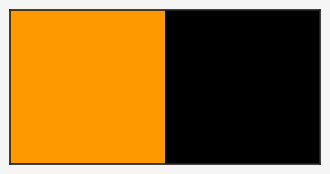

In [ ]:
#importing ploting libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
colors = ['#FF9900','#000000']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
sns.palplot(colors, size=2)

Text(0.5, 1.0, 'AMAZON Stock value changes since 2010')

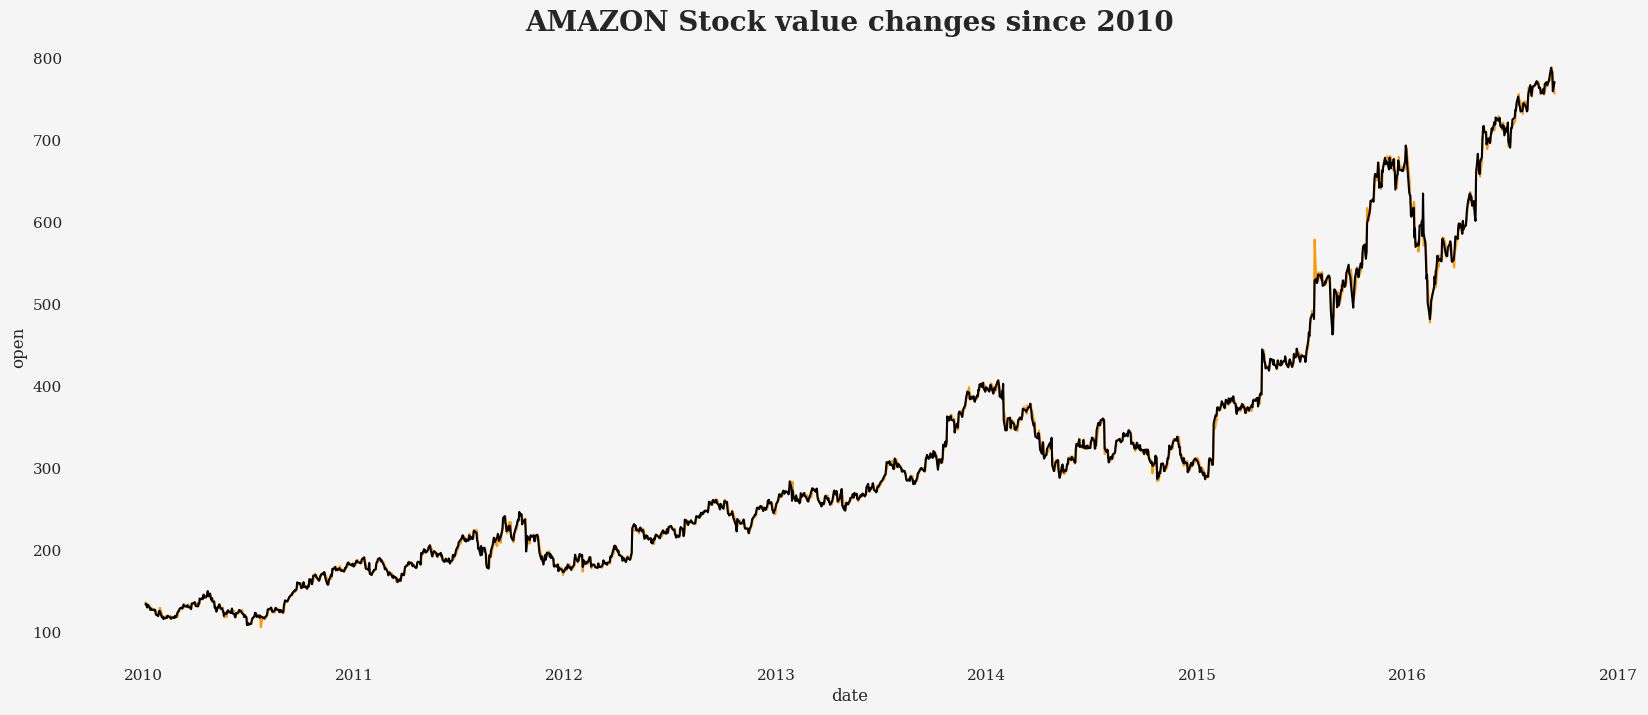

In [ ]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='open')
ax=sns.lineplot(data=df1, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("AMAZON Stock value changes since 2010", size=20, weight='bold')

Text(0.5, 1.0, 'Google Stock volume')

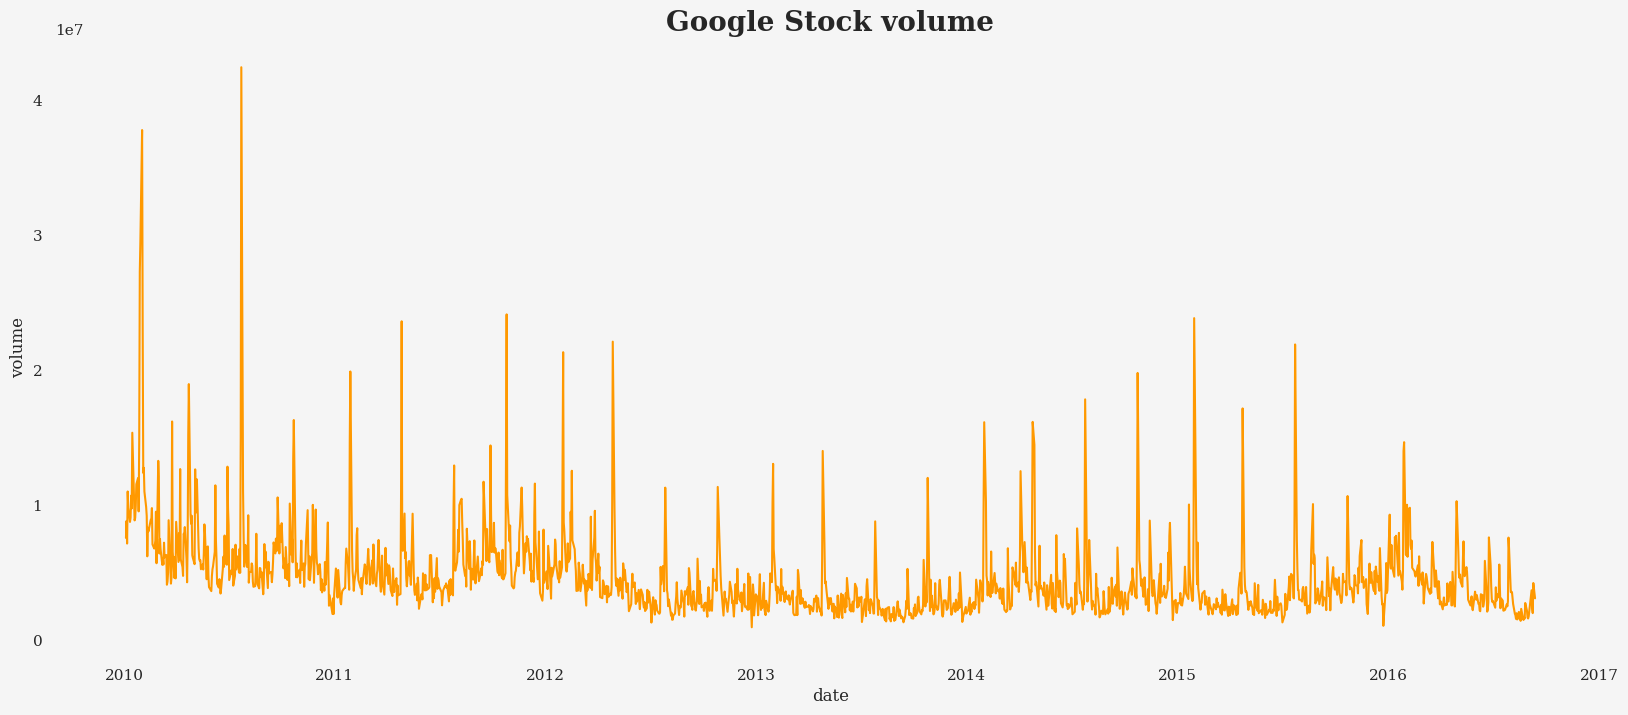

In [ ]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='volume')
#ax=sns.lineplot(data=df1, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
plt.title("Google Stock volume", size=20, weight='bold')

# Univariated Analysis

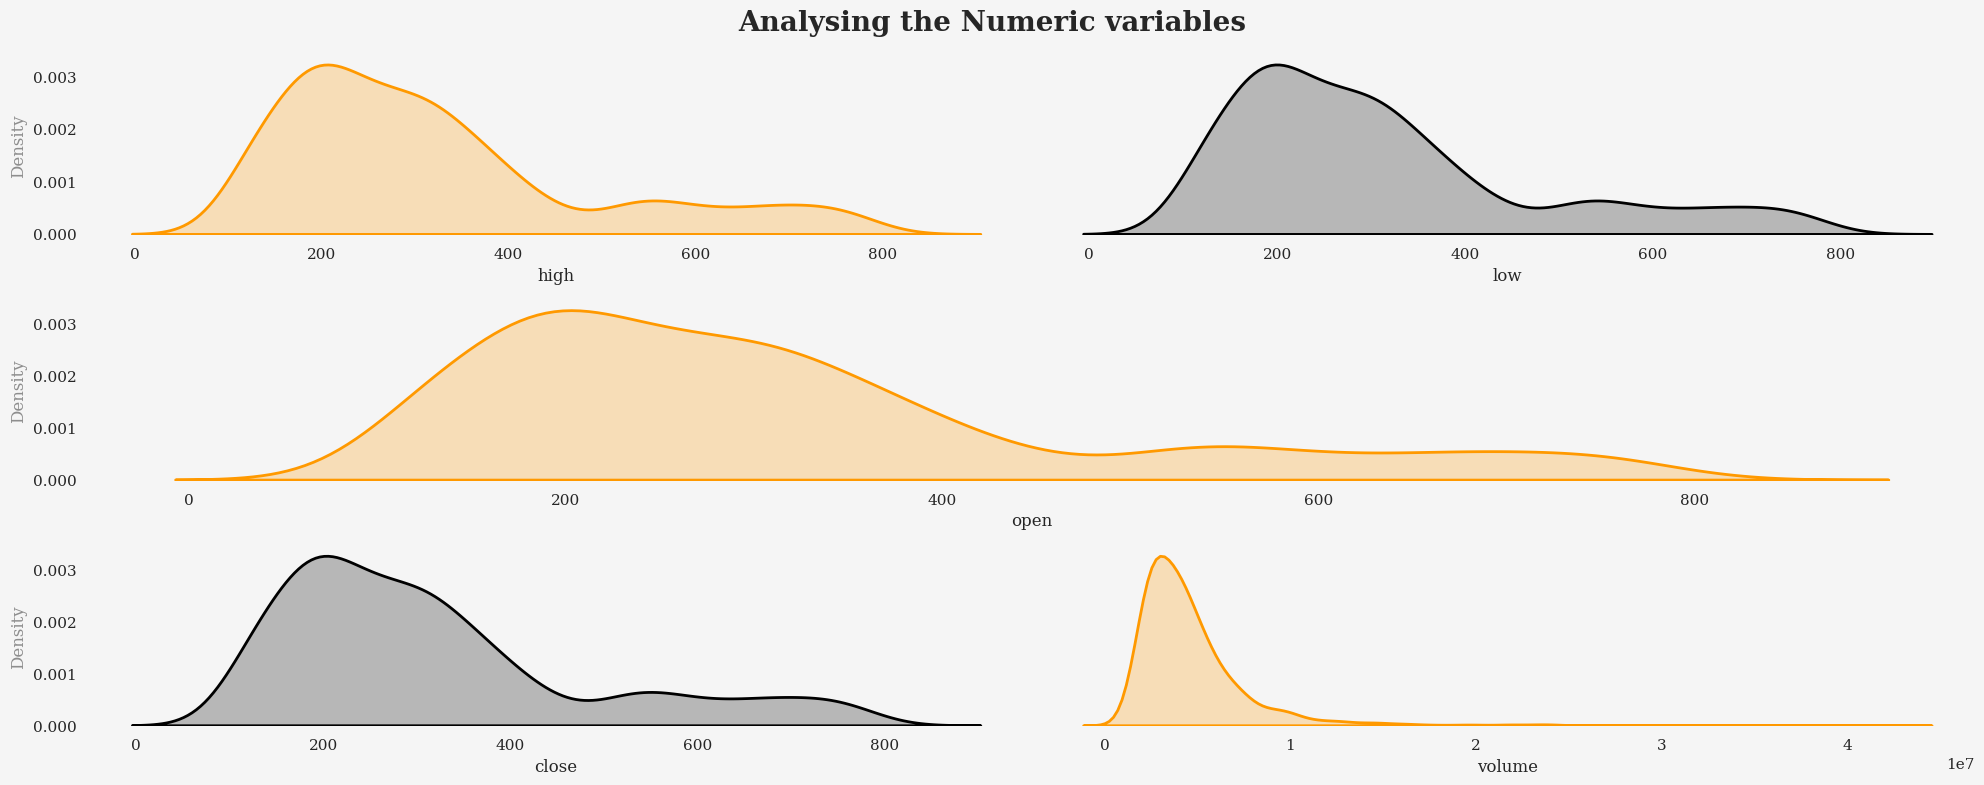

In [ ]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Analysing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(df1['high'], ax=ax['A'], color=colors[0], fill=True, linewidth=2)
sns.kdeplot(df1['low'], ax=ax['B'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df1['open'], ax=ax['C'], color=colors[0],fill=True, linewidth=2)
sns.kdeplot(df1['close'], ax=ax['D'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df1['volume'], ax=ax['E'], color=colors[0],fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

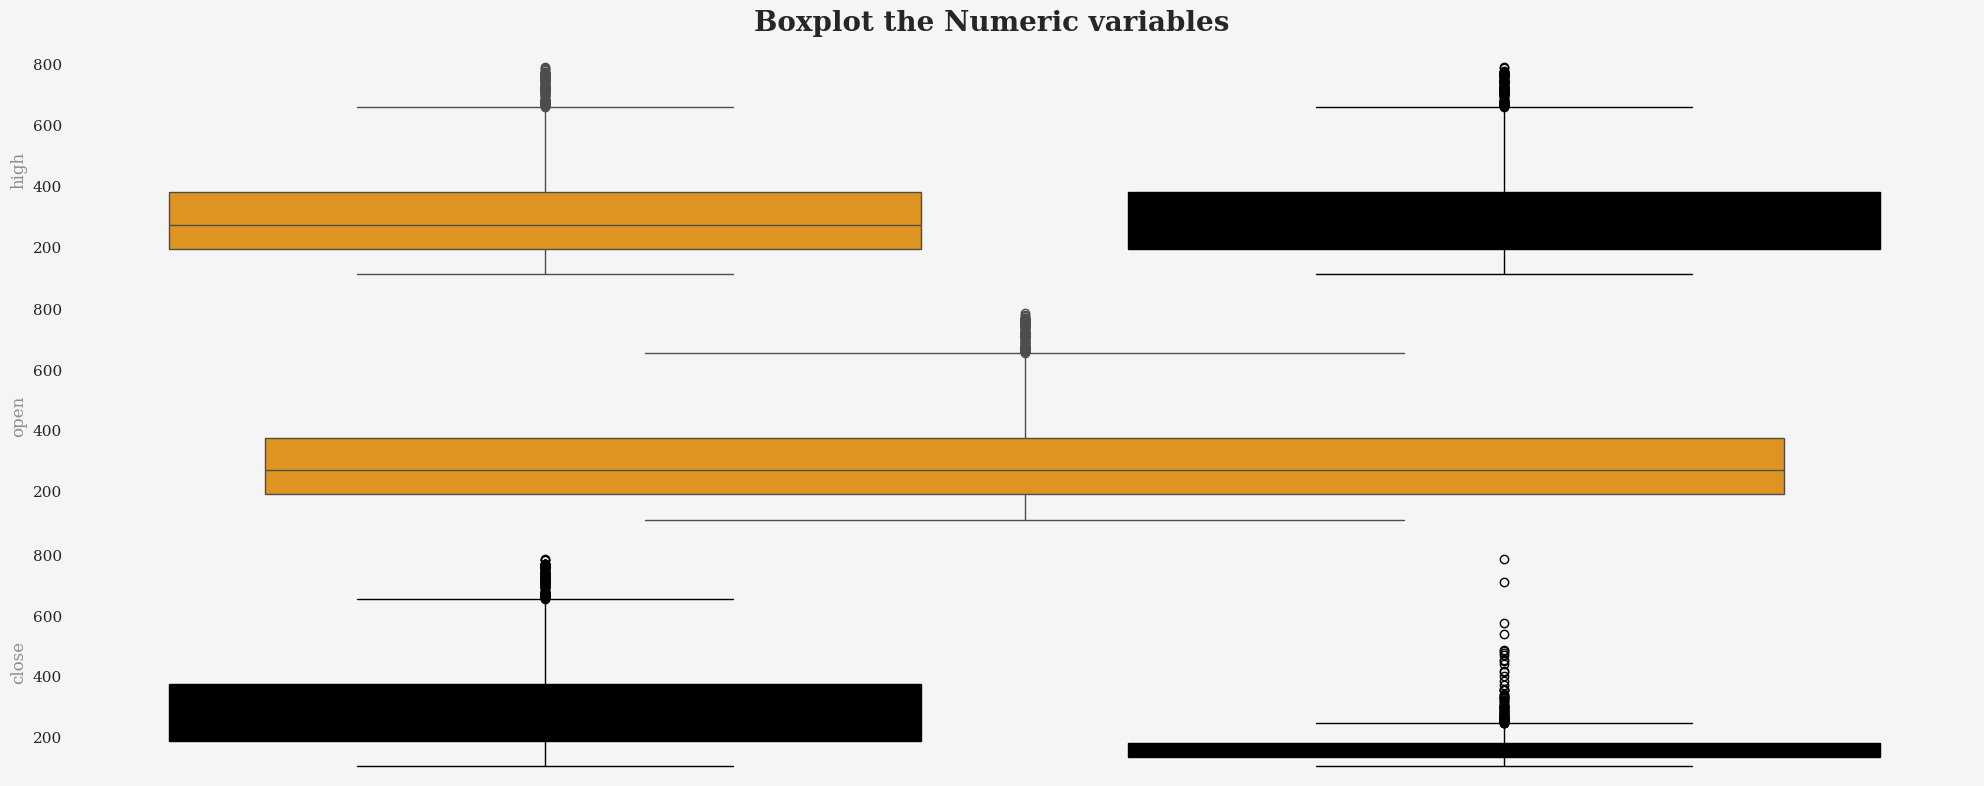

In [ ]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Boxplot the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.boxplot(df1['high'], ax=ax['A'], color=colors[0])
sns.boxplot(df1['low'], ax=ax['B'], color=colors[1])
sns.boxplot(df1['open'], ax=ax['C'], color=colors[0])
sns.boxplot(df1['close'], ax=ax['D'], color=colors[1])
sns.boxplot(df1['volume'], ax=ax['E'], color=colors[1])
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

*There seems to be ouliers in the data set, however, those values can't be considered as outlier as they may be extrem values during peak selling days
Date column has been ingored as it is series of numbers
Let us analyse more for conclusion*

# Categorical feature analysis
** There is no categorical feature other than Symbol. as we have taken the Google stock as sample data, we will drop the Symbol feature.

In [ ]:
df1.drop(['symbol'], axis=1, inplace=True)

# Bivariated & Multivariated Analysis

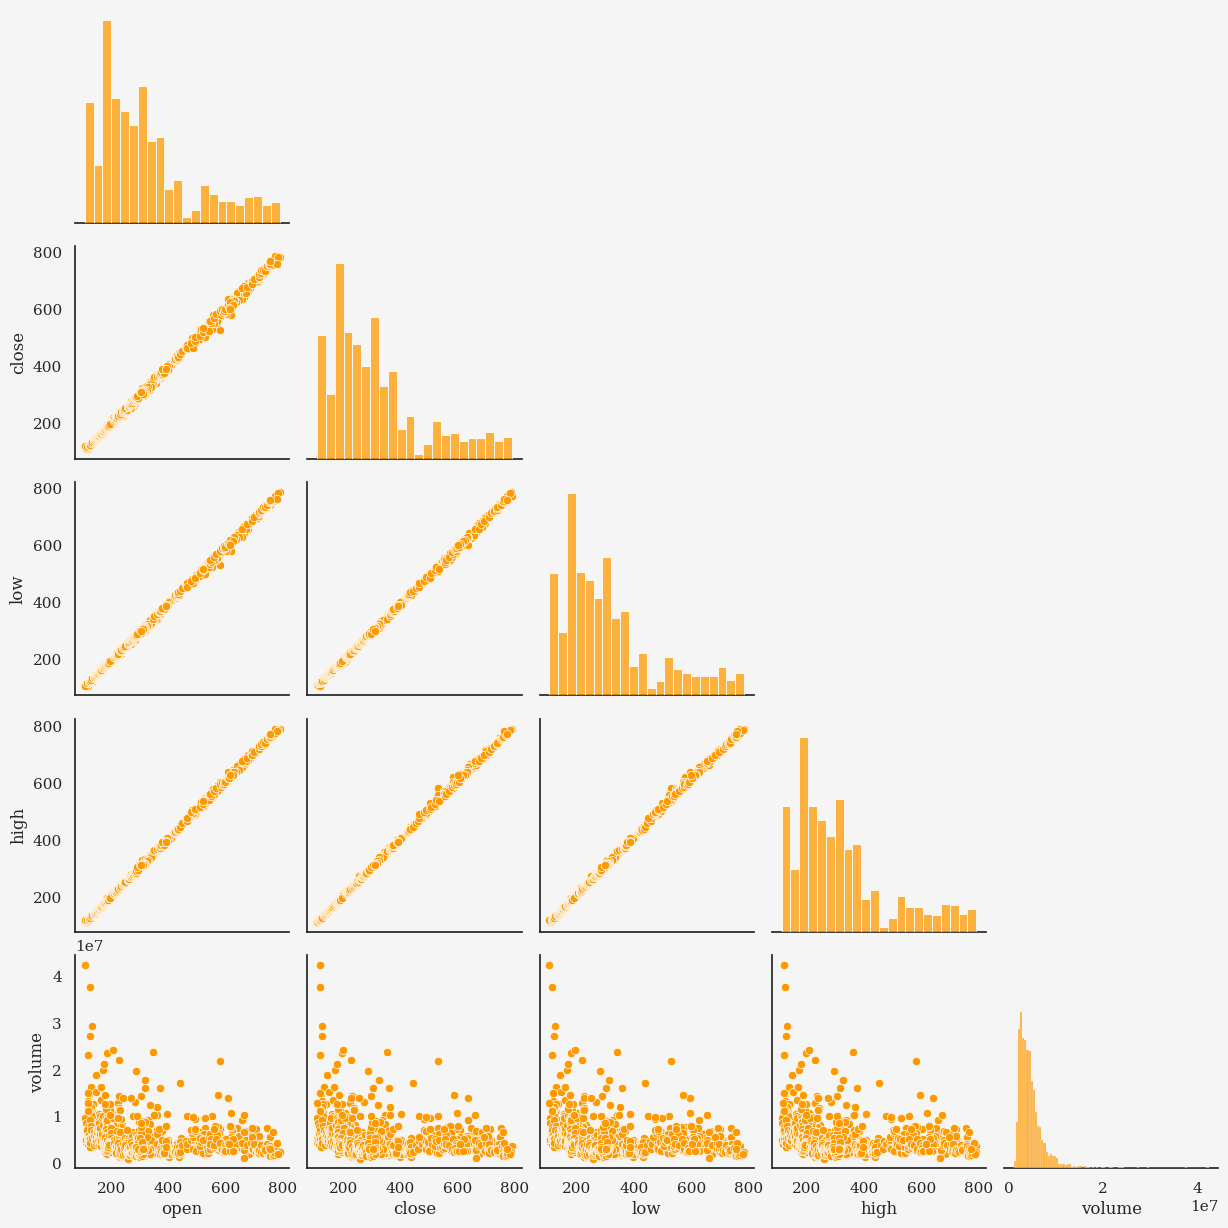

In [ ]:
# we need to predict the closing price of the stock, lets us consider 'Close' feature as the Target variable.
sns.pairplot(df1,corner=True)

In [ ]:
df1.corr()['close']

date      0.905940
open      0.999505
close     1.000000
low       0.999796
high      0.999776
volume   -0.252756
Name: close, dtype: float64

# Hypothesis test to find the Normality in the Dataset

In [ ]:
from scipy.stats import levene, shapiro
int_cols=df1.select_dtypes(exclude=['object','datetime']).columns.to_list() # Exclude datetime columns
from scipy.stats import shapiro

for i in int_cols:
    _, p_value=shapiro(df1[i])
    if p_value<0.05:
        print("Feature {} is normaly distributed".format(i))
    else:
        print("Feature {} is not normaly distributed".format(i))

    print("Normalitiy test p_value for featue -  {} is {}".format(i,np.round(p_value,3)))

Feature open is normaly distributed
Normalitiy test p_value for featue -  open is 0.0
Feature close is normaly distributed
Normalitiy test p_value for featue -  close is 0.0
Feature low is normaly distributed
Normalitiy test p_value for featue -  low is 0.0
Feature high is normaly distributed
Normalitiy test p_value for featue -  high is 0.0
Feature volume is normaly distributed
Normalitiy test p_value for featue -  volume is 0.0


# Correlation

<Axes: >

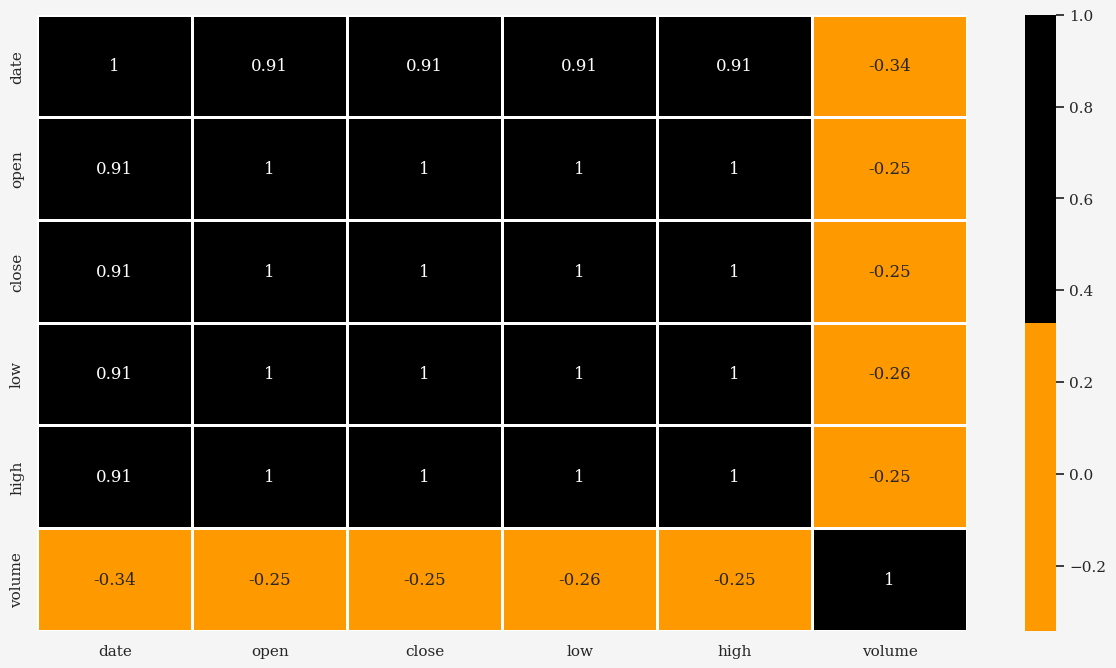

In [ ]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True, cmap=[colors[0],colors[1]], linecolor='white', linewidth=2 )

*feature Open, high, low are highly correlated to Target feature Close. we can use either one of the feature for prediction to avoid multicollinearity*

# Train Test Split

In [ ]:
X=df1[['volume','open']]
y=df1['close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

# Normalizing the values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

# Model Creation
Basic Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)

Text(800000, 540, 'Mean Absolute error : 58.73')

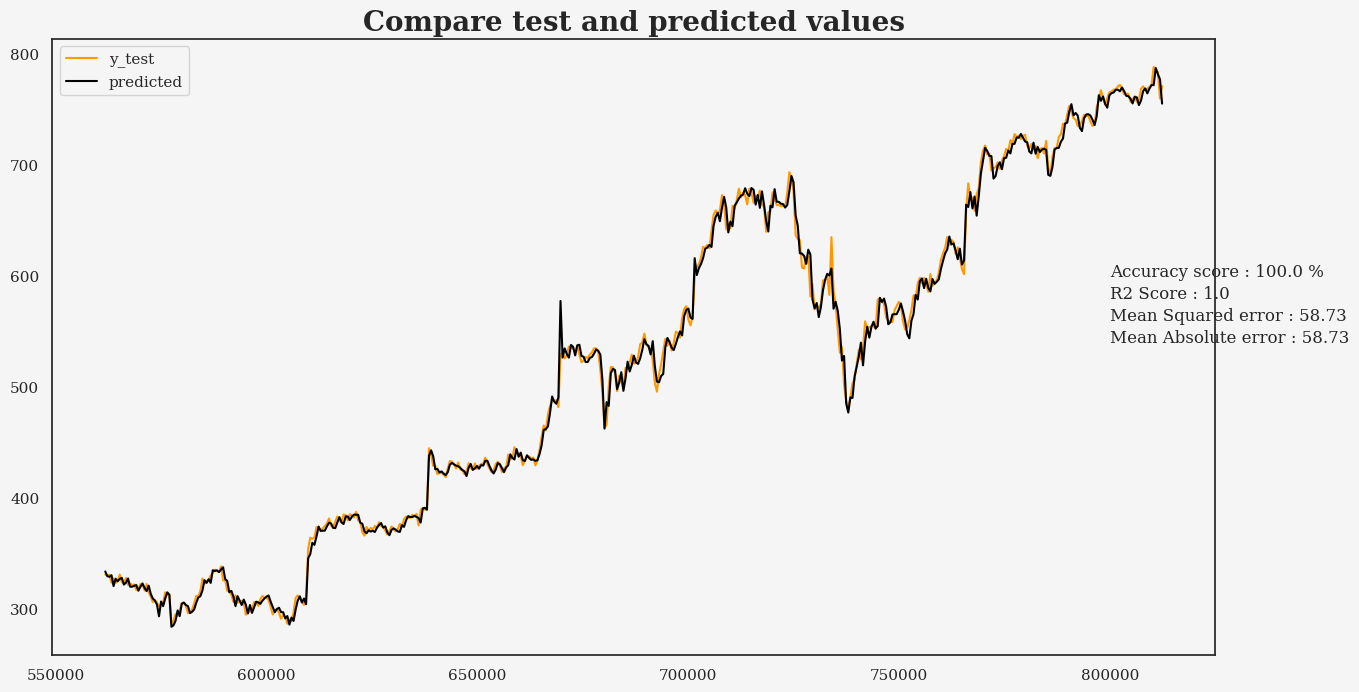

In [ ]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')
plt.text(x=800000, y=600,s='Accuracy score : {} %'.format(sc))
plt.text(x=800000, y=580,s='R2 Score : {}'.format(r2))
plt.text(x=800000, y=560,s='Mean Squared error : {}'.format(mse))
plt.text(x=800000, y=540,s='Mean Absolute error : {}'.format(mae))

# Try with LSTM

In [ ]:
X=df1[['open','high']]
y=df1['close']
length=100
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)
training_set = X.iloc[:1000].values
test_set = X.iloc[1000:].values
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 17s 325ms/step - loss: 0.0372 - val_loss: 0.3604
Epoch 2/100
29/29 [==============================] - 6s 221ms/step - loss: 0.0061 - val_loss: 0.0778
Epoch 3/100
29/29 [==============================] - 7s 249ms/step - loss: 0.0053 - val_loss: 0.0944
Epoch 4/100
29/29 [==============================] - 6s 210ms/step - loss: 0.0044 - val_loss: 0.0323
Epoch 5/100
29/29 [==============================] - 8s 264ms/step - loss: 0.0043 - val_loss: 0.0534
Epoch 6/100
29/29 [==============================] - 6s 208ms/step - loss: 0.0036 - val_loss: 0.0379
Epoch 7/100
29/29 [==============================] - 8s 267ms/step - loss: 0.0037 - val_loss: 0.0323
Epoch 8/100
29/29 [==============================] - 6s 210ms/step - loss: 0.0034 - val_loss: 0.0347
Epoch 9/100
29/29 [==============================] - 8s 274ms/step - loss: 0.0034 - val_loss: 0.0302
Epoch 10/100
29/29 [==============================] - 6s 208ms/step - loss: 0.0035 - val_l

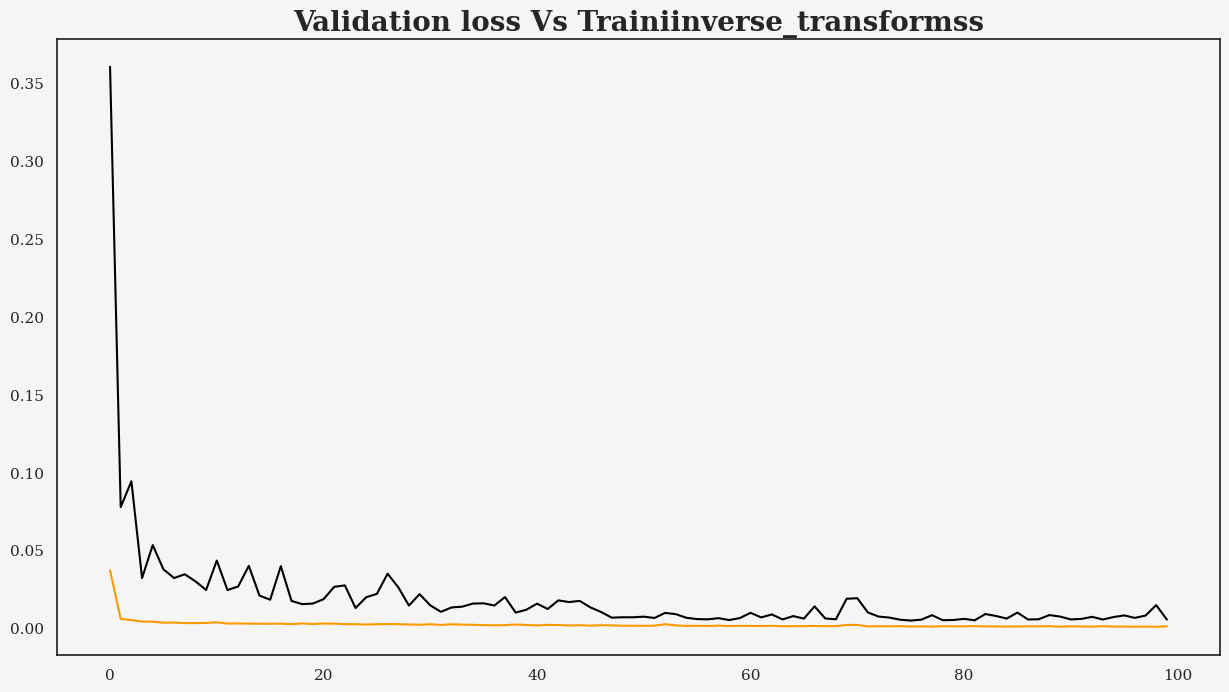

In [ ]:
loss = pd.DataFrame(model.history.history)
fig=plt.figure(figsize=(15,8))
plt.title("Validation loss Vs Trainiinverse_transformss", size=20, weight='bold')
plt.plot(loss)


In [ ]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test

19/19 [==============================] - 2s 48ms/step


,test,pred
0,0.647729,0.704273
1,0.652302,0.698525
2,0.669738,0.690036
3,0.679428,0.686709
4,0.680827,0.691508
...,...,...
580,2.279694,2.129705
581,2.332549,2.131942
582,2.313304,2.143725
583,2.297847,2.149201


Text(500, 1.25, 'Mean Absolute error : 0.01')

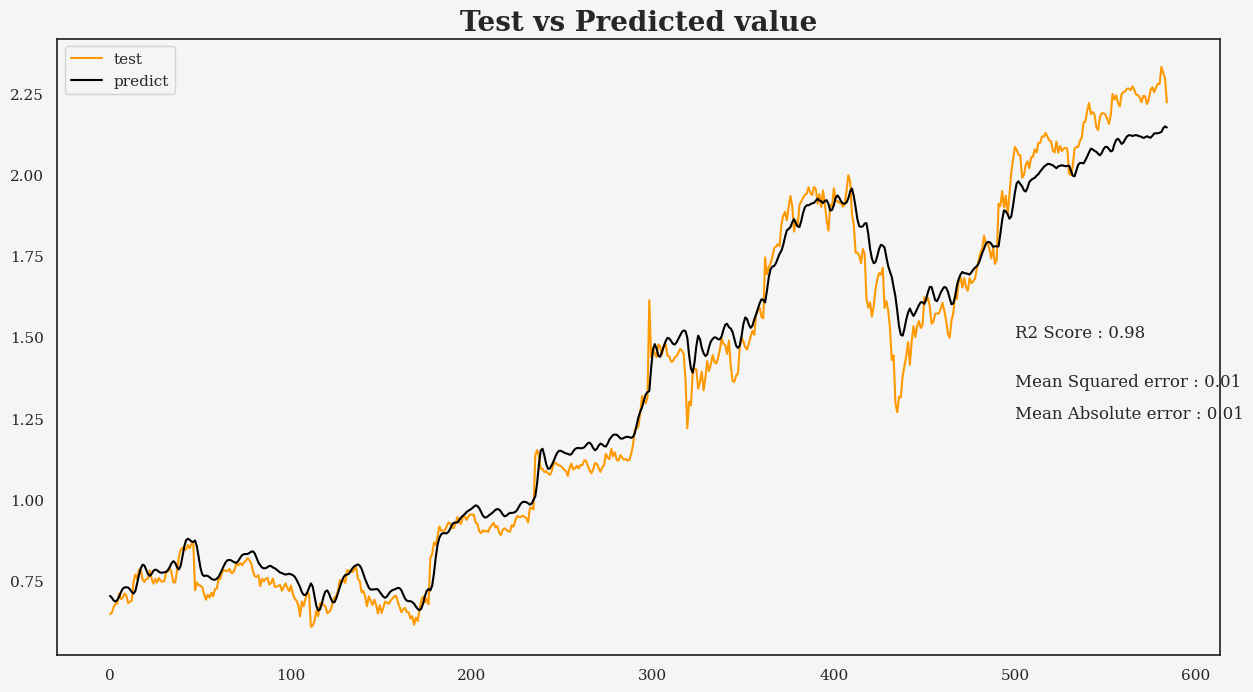

In [ ]:
fig=plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)
plt.text(x=500, y=1.5,s='R2 Score : {}'.format(r2))
plt.text(x=500, y=1.35,s='Mean Squared error : {}'.format(mse))
plt.text(x=500, y=1.25,s='Mean Absolute error : {}'.format(mae))

# Try with FBProphet

In [ ]:
from fbprophet import Prophet
df_p = df1[['date','close']]
df_p.columns=['ds','y']

split_data = df_p.index.max()-100000
train = df_p.loc[df_p.index<=split_data].copy()
test=df_p.loc[df_p.index>split_data].copy()
train.set_index('ds',inplace=True)
test.set_index('ds',inplace=True)
train.reset_index(inplace=True)
test.reset_index(inplace=True)

#Model creation
model=Prophet()
model.fit(train)

#model prediction
pred=model.predict(test)

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
test_pred=pd.DataFrame(columns=['ds','test','predict','pred_lower','pred_high'], index=test.index)
test_pred['test']=test['y']
test_pred['ds']=test['ds']
test_pred['predict']=pred['yhat']
test_pred['pred_lower']=pred['yhat_lower']
test_pred['pred_high']=pred['yhat_upper']

In [ ]:
#plotting Test vs Predicted
fig=plt.figure(figsize=(15,8))
plt.title("Test Vs Prediction", size=20, weight='bold')
sns.lineplot(data=test_pred,x='ds',y='test')
sns.lineplot(data=test_pred,x='ds',y='predict')

r2=np.round(r2_score(test_pred['test'],test_pred['predict']),2)
mse=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
mae=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
plt.text(x=mdates.datestr2num('2016-10'), y=700,s='R2 Score : {}'.format(r2))
plt.text(x=mdates.datestr2num('2016-10'), y=680,s='Mean Squared error : {}'.format(mse))
plt.text(x=mdates.datestr2num('2016-10'), y=660,s='Mean Absolute error : {}'.format(mae))

In [ ]:
fig=plt.figure(figsize=(15,8))
plt.title("Test Vs Prediction", size=20, weight='bold')
sns.lineplot(data=train,x='ds',y='y')
sns.lineplot(data=test_pred,x='ds',y='predict')
sns.lineplot(data=test_pred,x='ds',y='test', alpha=0.5, ls='--', color='black')

r2=np.round(r2_score(test_pred['test'],test_pred['predict']),2)
mse=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
mae=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
plt.text(x=mdates.datestr2num('2015'), y=300,s='R2 Score : {}'.format(r2))
plt.text(x=mdates.datestr2num('2015'), y=260,s='Mean Squared error : {}'.format(mse))
plt.text(x=mdates.datestr2num('2015'), y=220,s='Mean Absolute error : {}'.format(mae))
plt.legend(['Train','Predict','Test'])